In [1]:
%load_ext autoreload
%autoreload 2
from helper import split_timeseries, get_feature_target, read_our_data, lin_reg_feat_importance, var_imp_plot, gamw, imp_df
#from helper2 import lin_reg_feat_importance, var_imp_plot, gamw, imp_df

In [2]:
import pandas as pd
import os
notebook_path = os.path.abspath('')

In [3]:
# calling the dataset
df =read_our_data('clean_lagged.csv')

In [4]:
df = df.set_index('Timestamp')

In [5]:
#df.info()
df.columns.values

array(['DK_1_imports', 'SE_4_imports', 'DK_1_exports', 'SE_4_exports',
       'Day_Ahead_price', 'Forecasted_Load', 'Actual_Load', 'Solar_[MW]',
       'ttf_price', 'coal_price', 'co2_price',
       'Biomass_Actual_Aggregated_[MW]', 'Waste_Actual_Aggregated_[MW]',
       'DE_LU_AT_imports', 'DE_LU_AT_exports', 'Year', 'Quarter', 'Month',
       'Date', 'Day', 'Weekday', 'Hour', 'Week', 'business', 'Wind Total',
       'DAP-lag24', 'DAP-lag36', 'DAP-lag48', 'DAP-lag72', 'DAP-lag168',
       'DAP-lag-168'], dtype=object)

In [6]:
# df.corr()

In [7]:
cols = df.columns.values.tolist()

In [8]:
cols

['DK_1_imports',
 'SE_4_imports',
 'DK_1_exports',
 'SE_4_exports',
 'Day_Ahead_price',
 'Forecasted_Load',
 'Actual_Load',
 'Solar_[MW]',
 'ttf_price',
 'coal_price',
 'co2_price',
 'Biomass_Actual_Aggregated_[MW]',
 'Waste_Actual_Aggregated_[MW]',
 'DE_LU_AT_imports',
 'DE_LU_AT_exports',
 'Year',
 'Quarter',
 'Month',
 'Date',
 'Day',
 'Weekday',
 'Hour',
 'Week',
 'business',
 'Wind Total',
 'DAP-lag24',
 'DAP-lag36',
 'DAP-lag48',
 'DAP-lag72',
 'DAP-lag168',
 'DAP-lag-168']

In [9]:
drop_values = ['Timestamp', 'Date', 'Day_Ahead_price']

In [10]:
features = [x for x in cols if x not in drop_values]

In [11]:
target = 'Day_Ahead_price'

In [12]:
features

['DK_1_imports',
 'SE_4_imports',
 'DK_1_exports',
 'SE_4_exports',
 'Forecasted_Load',
 'Actual_Load',
 'Solar_[MW]',
 'ttf_price',
 'coal_price',
 'co2_price',
 'Biomass_Actual_Aggregated_[MW]',
 'Waste_Actual_Aggregated_[MW]',
 'DE_LU_AT_imports',
 'DE_LU_AT_exports',
 'Year',
 'Quarter',
 'Month',
 'Day',
 'Weekday',
 'Hour',
 'Week',
 'business',
 'Wind Total',
 'DAP-lag24',
 'DAP-lag36',
 'DAP-lag48',
 'DAP-lag72',
 'DAP-lag168',
 'DAP-lag-168']

In [13]:
# setting up splits
k_folds = 3
train_start = pd.to_datetime(['2018-01-01', '2021-01-01', '2021-07-01'], format = '%Y-%m-%d')

In [14]:
df = df.drop('Date', axis = 1)

In [15]:
df.columns

Index(['DK_1_imports', 'SE_4_imports', 'DK_1_exports', 'SE_4_exports',
       'Day_Ahead_price', 'Forecasted_Load', 'Actual_Load', 'Solar_[MW]',
       'ttf_price', 'coal_price', 'co2_price',
       'Biomass_Actual_Aggregated_[MW]', 'Waste_Actual_Aggregated_[MW]',
       'DE_LU_AT_imports', 'DE_LU_AT_exports', 'Year', 'Quarter', 'Month',
       'Day', 'Weekday', 'Hour', 'Week', 'business', 'Wind Total', 'DAP-lag24',
       'DAP-lag36', 'DAP-lag48', 'DAP-lag72', 'DAP-lag168', 'DAP-lag-168'],
      dtype='object')

In [16]:
df.isna().sum()

DK_1_imports                        0
SE_4_imports                        0
DK_1_exports                        0
SE_4_exports                        0
Day_Ahead_price                     0
Forecasted_Load                     0
Actual_Load                         0
Solar_[MW]                          0
ttf_price                           0
coal_price                          0
co2_price                           0
Biomass_Actual_Aggregated_[MW]      0
Waste_Actual_Aggregated_[MW]        0
DE_LU_AT_imports                    0
DE_LU_AT_exports                    0
Year                                0
Quarter                             0
Month                               0
Day                                 0
Weekday                             0
Hour                                0
Week                                0
business                            0
Wind Total                          0
DAP-lag24                          24
DAP-lag36                          36
DAP-lag48   

In [17]:
df.dropna(axis=0, how='any', inplace=True)

### Prepare  features and target using the function

In [18]:
trainset, testset = split_timeseries(df, train_start, 0, 1)

In [19]:
x_train, y_train = get_feature_target(trainset, features, target)

In [20]:
x_test, y_test = get_feature_target(testset, features, target)

### Linear Regression Feature Importance

In [21]:
lin_reg_feat_importance(x_train, y_train, x_test, y_test)

,feature,feature_importance
0,DAP-lag24,4.667485
1,coal_price,3.284401
2,DAP-lag-168,2.931310
3,DAP-lag168,2.568571
4,Forecasted_Load,2.249432
5,co2_price,2.124405
6,Week,1.477359
7,Actual_Load,1.268790
8,business,1.008584
9,DAP-lag72,0.950326


In [22]:
lr_imp = lin_reg_feat_importance(x_train, y_train, x_test, y_test)

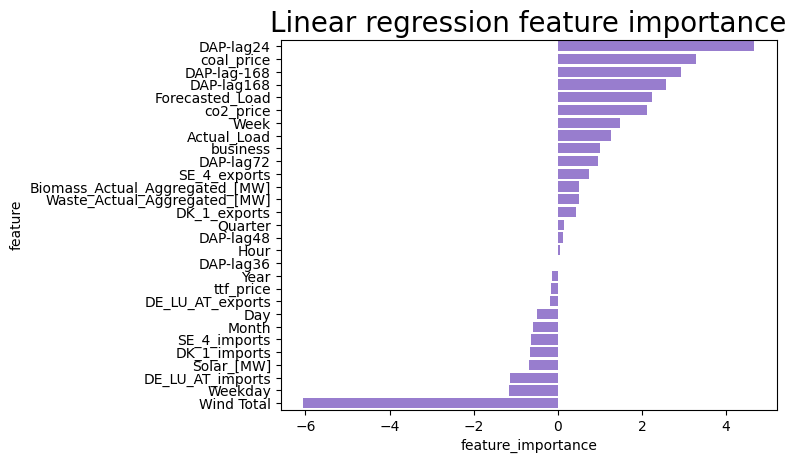

In [23]:
# plot
var_imp_plot(lr_imp, 'Linear regression feature importance')

### Random Forest Feature Importance

In [25]:
# first function but we will probably not keep it
#build_rf_2(x_train, y_train, x_test)

In [24]:
gamw(x_train, y_train)

array([0.00561951, 0.0057601 , 0.00150291, 0.00628231, 0.01100455,
       0.01249713, 0.00700437, 0.02646952, 0.01068064, 0.01725503,
       0.03400859, 0.01319796, 0.00417321, 0.00427516, 0.00158342,
       0.00066633, 0.00203824, 0.00846315, 0.01259471, 0.00478894,
       0.00882823, 0.00355481, 0.09153368, 0.440133  , 0.00715931,
       0.01506368, 0.01432653, 0.06287359, 0.1666614 ])

In [25]:
rand_importances = gamw(x_train, y_train, random_search=True)

KeyboardInterrupt: 

In [ ]:
randf_imp = imp_df(features, rand_importances)
randf_imp

In [ ]:
var_imp_plot(randf_imp, 'Random Forest Feature Importance')

### XGBoost

In [ ]:
xgimportances = xgb_feat_imp(x_train, y_train)

In [ ]:
xgbimp = imp_df(features, xgimportances)
xgbimp

In [ ]:
var_imp_plot(xgbimp, 'XGBoost Feature Importances')